In [1]:
import numpy as np
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold
import matplotlib.pylab as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from utils import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pylab as plt
from imblearn.over_sampling import SMOTE
import sys

# string to number

In [2]:
col_names = ["age", "job", "marital", "education", "default","housing","loan","contact","month","day_of_week"
             ,"duration","campaign","pdays","previous","poutcome","emp.var.rate","cons.price.idx",
             "cons.conf.idx","euribor3m","nr.employed","y"]
class_names = ["yes", "no"]
job_to_int={"admin.":0,"blue-collar":1,"entrepreneur":2,"housemaid":3,"management":4,"retired":5,"self-employed":6,
            "services":7,"student":8,"technician":9,"unemployed":10,"unknown":11}
marital_to_int={"divorced":0,"married":1,"single":2,"unknown":3}
education_to_int={"basic.4y":0,"basic.6y":1,"basic.9y":2,"high.school":3,"illiterate":4,"professional.course":5,
                  "university.degree":6,"unknown":7}
default_to_int={"no":0,"yes":1,"unknown":2}
housing_to_int={"no":0,"yes":1,"unknown":2}
loan_to_int={"no":0,"yes":1,"unknown":2}
contact_to_int={"cellular":0,"telephone":1}
month_to_int={"jan":0,"feb":1,"mar":2,"apr":3,"may":4,"jun":5,"jul":6,
              "aug":7,"sep":8,"oct":9,"nov":10,"dec":11}
day_to_int={"mon":0,"tue":1,"wed":2,"thu":3,"fri":4}
poutcome_to_int={"failure":0,"nonexistent":1,"success":2}
class_to_int = {"yes": 0, "no": 1}

In [3]:
data_dir = os.path.abspath("./data/")
data_file = os.path.abspath(data_dir + "/blank.csv")
df = pd.read_csv(data_file,names=col_names,header=0,sep=';')

In [4]:
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon ...         1    999         0  nonexistent          1.1   
1   may         mon ...         1    999         0  nonexistent          1.1   
2   may         mon ...         1    999         0  nonexistent          1.1   
3   may         mon ...         1    999         0  nonexistent          1.1   
4   may         mon ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  

In [5]:
for i in df:
    print("列名：\t%-8s\t , 有\t%-5d\t个Unknown数据；"%(i,list(df[i]).count("unknown")))

列名：	age     	 , 有	0    	个Unknown数据；
列名：	job     	 , 有	330  	个Unknown数据；
列名：	marital 	 , 有	80   	个Unknown数据；
列名：	education	 , 有	1731 	个Unknown数据；
列名：	default 	 , 有	8597 	个Unknown数据；
列名：	housing 	 , 有	990  	个Unknown数据；
列名：	loan    	 , 有	990  	个Unknown数据；
列名：	contact 	 , 有	0    	个Unknown数据；
列名：	month   	 , 有	0    	个Unknown数据；
列名：	day_of_week	 , 有	0    	个Unknown数据；
列名：	duration	 , 有	0    	个Unknown数据；
列名：	campaign	 , 有	0    	个Unknown数据；
列名：	pdays   	 , 有	0    	个Unknown数据；
列名：	previous	 , 有	0    	个Unknown数据；
列名：	poutcome	 , 有	0    	个Unknown数据；
列名：	emp.var.rate	 , 有	0    	个Unknown数据；
列名：	cons.price.idx	 , 有	0    	个Unknown数据；
列名：	cons.conf.idx	 , 有	0    	个Unknown数据；
列名：	euribor3m	 , 有	0    	个Unknown数据；
列名：	nr.employed	 , 有	0    	个Unknown数据；
列名：	y       	 , 有	0    	个Unknown数据；


# create a new dataFrame

In [6]:
total=[]

for index,row in df.iterrows():
    temp = []
    temp.append(row['age'])
    temp.append(job_to_int[row['job']])
    temp.append(marital_to_int[row['marital']])
    temp.append(education_to_int[row['education']])
    temp.append(default_to_int[row['default']])
    temp.append(housing_to_int[row['housing']])
    temp.append(loan_to_int[row['loan']])
    temp.append(contact_to_int[row['contact']])
    temp.append(month_to_int[row['month']])
    temp.append(day_to_int[row['day_of_week']])
    temp.append(row['duration'])
    temp.append(row['campaign'])
    temp.append(row['pdays'])
    temp.append(row['previous'])
    temp.append(poutcome_to_int[row['poutcome']])
    temp.append(row['emp.var.rate'])
    temp.append(row['cons.price.idx'])
    temp.append(row['cons.conf.idx'])
    temp.append(row['euribor3m'])
    temp.append(row['nr.employed'])
    temp.append(class_to_int[row['y']])
    total.append(temp)


In [7]:
new_df=pd.DataFrame(total)
new_df.columns=col_names
print (new_df.describe())

               age          job       marital     education       default  \
count  41188.00000  41188.00000  41188.000000  41188.000000  41188.000000   
mean      40.02406      3.72458      1.172769      3.747184      0.417525   
std       10.42125      3.59456      0.608902      2.136482      0.812813   
min       17.00000      0.00000      0.000000      0.000000      0.000000   
25%       32.00000      0.00000      1.000000      2.000000      0.000000   
50%       38.00000      2.00000      1.000000      3.000000      0.000000   
75%       47.00000      7.00000      2.000000      6.000000      0.000000   
max       98.00000     11.00000      3.000000      7.000000      2.000000   

            housing          loan       contact         month   day_of_week  \
count  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000   
mean       0.571914      0.199767      0.365252      5.607896      1.979581   
std        0.541209      0.456002      0.481507      2.040998      1.

# calculate the covariance matrix

In [8]:
corr=new_df.corr()
print (corr.iloc[20,:])
total = np.array(total)

age              -0.030399
job              -0.025122
marital          -0.046203
education        -0.057799
default           0.099324
housing          -0.009552
loan              0.005038
contact           0.144773
month            -0.037187
day_of_week      -0.010051
duration         -0.405274
campaign          0.066357
pdays             0.324914
previous         -0.230181
poutcome         -0.129789
emp.var.rate      0.298334
cons.price.idx    0.136211
cons.conf.idx    -0.054878
euribor3m         0.307771
nr.employed       0.354678
y                 1.000000
Name: y, dtype: float64


# the most relevant to y ： duration\nr.employed
## Analytical balance

4640
36548


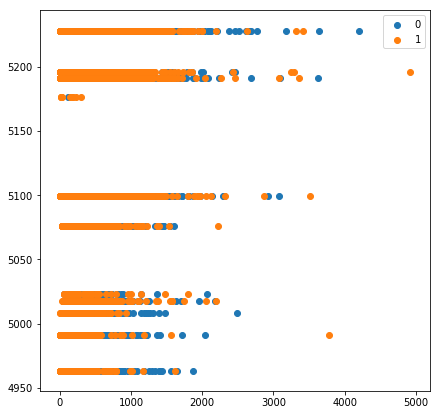

In [9]:

len_yes=len(new_df[new_df['y']==1])
len_no=len(new_df[new_df['y']==0])
groups = new_df.groupby('y')
fig, axes = plt.subplots(1, 1, figsize=(7, 7))

for name, group in groups:
    print (group['y'].size)
    axes.scatter(group['duration'].values,group['nr.employed'], marker='o', label=name)

axes.legend()
plt.show()


36548 36548
36548 4640


e:\python3.7.1\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
e:\python3.7.1\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys
e:\python3.7.1\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future beha

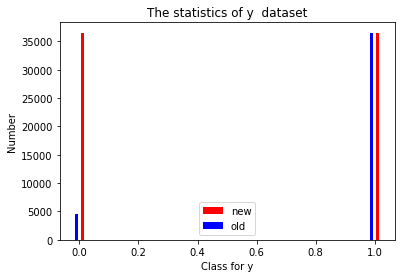

In [10]:
X=total[:,0:20]
y = df['y'].values
y = np.array([class_to_int[c] for c in y])
more_sample = SMOTE(random_state=21)
X, y = more_sample.fit_sample(X, y)
len_new_yes=len(y[[y==1]])
len_new_no=len(y[[y==0]])
print (len_new_yes,len_new_no)
print (len_yes,len_no)

plt.xlabel('Class for y')
plt.ylabel('Number')
plt.title('The statistics of y  dataset')
x_new=[0.01,1.01]
x_old=[-0.01,0.99]
old=[len_no,len_yes]
new=[len_new_no,len_new_yes]
plt.subplot(1,1,1)
plt.ylim=(0, 10)
plt.bar(x_new, new, facecolor='red', width=0.01, label = 'new')
plt.bar(x_old, old, facecolor='blue', width=0.01, label = 'old')
plt.legend()

plt.show()

# Normalized data

### 10、19

#### delete 5\6 because of low covariance

In [11]:
print (X[:,[10,19]])
scaler = MinMaxScaler( )
scaler.fit(X[:,10].reshape(-1,1))
X[:,10]=scaler.transform(X[:,1].reshape(-1,1)).reshape(1,-1)
scal = MinMaxScaler( )
scal.fit(X[:,19].reshape(-1,1))
X[:,19]=scal.transform(X[:,19].reshape(-1,1)).reshape(1,-1)
print (X[:,[1,19]])

X = X[:,[0,1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19]]

[[ 261.         5191.        ]
 [ 149.         5191.        ]
 [ 226.         5191.        ]
 ...
 [ 816.44274115 5228.1       ]
 [ 193.06729218 5017.5       ]
 [ 175.7696771  5076.2       ]]
[[3.         0.85973535]
 [7.         0.85973535]
 [7.         0.85973535]
 ...
 [2.21370573 1.        ]
 [0.         0.20378072]
 [0.2303229  0.42570888]]


In [13]:
def draw_acc(x_plot,y_plot):
    fig, ax = plt.subplots()
    ax.plot(x_plot, y_plot, 'o')
    plt.show()

# logistic regression
## 25% test     75%train
### find the best C  on the same data

e:\python3.7.1\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python3.7.1\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python3.7.1\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python3.7.1\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python3.7.1\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python3.7.1\lib\site-packages\sklearn

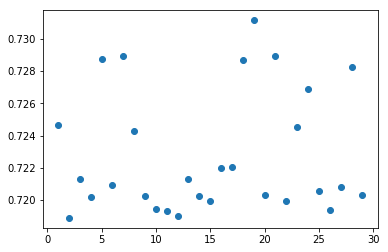

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
x_plot=[]
y_plot=[]
for step in range(1, 30):
    logistic_regression=LogisticRegression(C=step/100., solver='sag', multi_class='multinomial')
    logistic_regression.fit(X_train, y_train)
    pred=logistic_regression.predict(X_test)
    acc=accuracy_score(y_test, pred)
    x_plot.append(step)
    y_plot.append(acc)

draw_acc(x_plot=x_plot,y_plot=y_plot)

# C=0.19 ensemble

In [ ]:
model=[]
res=[]
for i in range(0, 15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    logistic_regression=LogisticRegression(C=0.19, solver='sag', multi_class='multinomial')
    logistic_regression.fit(X_train, y_train)
    pred=logistic_regression.predict(X_test)
    acc=accuracy_score(y_test, pred)
    model.append(logistic_regression)
    res.append(acc)

avg_acc=sum(res)/15.
print ('final result : %f ' %avg_acc)

e:\python3.7.1\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
e:\python3.7.1\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
e:\python3.7.1\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
e:\python3.7.1\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
e:\python3.7.1\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", Convergenc

Confusion matrix, without normalization
[[6781 2410]
 [2673 6410]]


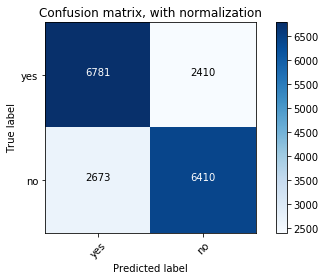

In [16]:

# Evaluate the confusion matrix
int_to_class = {0: "yes", 1: "no"}
cnf_matrix = confusion_matrix([int_to_class[c] for c in y_test], [int_to_class[c] for c in pred])

# Plot the confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, with normalization')
plt.show()

# random forest


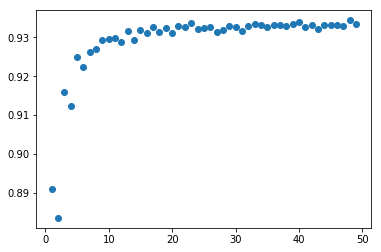

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
x_plot=[]
y_plot=[]
for step in range(1, 50):
    rf_model=RandomForestClassifier(n_estimators=step)
    rf_model.fit(X_train, y_train)
    pred=rf_model.predict(X_test)
    acc=accuracy_score(y_test, pred)
    x_plot.append(step)
    y_plot.append(acc)

draw_acc(x_plot=x_plot,y_plot=y_plot)

#### n_estimators=49


In [19]:
model=[]
res=[]
for step in range(0, 15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=step) #random select
    rf_model=RandomForestClassifier(n_estimators=49)
    rf_model.fit(X_train, y_train)
    pred=rf_model.predict(X_test)
    acc=accuracy_score(y_test, pred)
    model.append(rf_model)
    res.append(acc)
avg_acc=sum(res)/15.
print ('final result : %f ' %avg_acc)

final result : 0.933979 


Confusion matrix, without normalization
[[8728  463]
 [ 668 8415]]


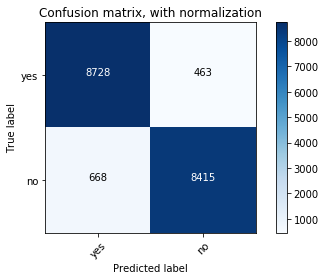

In [20]:
int_to_class = {0: "yes", 1: "no"}
cnf_matrix = confusion_matrix([int_to_class[c] for c in y_test], [int_to_class[c] for c in pred])

# Plot the confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, with normalization')
plt.show()

# KNN

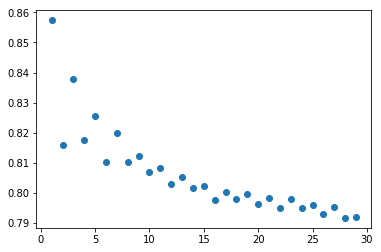

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)
x_plot=[]
y_plot=[]
for step in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=step)
    knn_model.fit(X_train, y_train)
    pred=knn_model.predict(X_test)
    acc=accuracy_score(y_test, pred)
    x_plot.append(step)
    y_plot.append(acc)
draw_acc(x_plot=x_plot,y_plot=y_plot)


In [22]:
model=[]
res=[]
for i in range(0, 15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    knn_model = KNeighborsClassifier(n_neighbors=1)
    knn_model.fit(X_train, y_train)
    pred=knn_model.predict(X_test)
    acc=accuracy_score(y_test, pred)
    model.append(knn_model)
    res.append(acc)
    

avg_acc=sum(res)/15.
print ('final result : %f ' %avg_acc)

final result : 0.857025 


Confusion matrix, without normalization
[[7441 1750]
 [ 841 8242]]


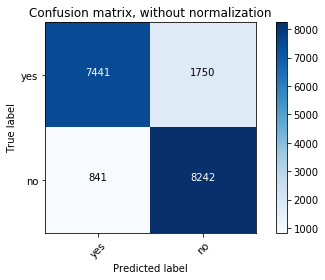

In [24]:
# Evaluate the confusion matrix
cnf_matrix = confusion_matrix([int_to_class[c] for c in y_test], [int_to_class[c] for c in pred])

# Plot the confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()